# An exploration of the NFL data from 2003 to 2023. I want to investigate how different variables lead to team success.

### Data was downloaded from Kaggle. https://www.kaggle.com/datasets/nickcantalupa/nfl-team-data-2003-2023.

In [17]:
import pandas as pd

# Read in the data
nfl_data = pd.read_csv("data/team_stats_2003_2023.csv")
nfl_data.head(20)

,year,team,wins,losses,win_loss_perc,points,points_opp,points_diff,mov,g,...,rush_td,rush_yds_per_att,rush_fd,penalties,penalties_yds,pen_fd,score_pct,turnover_pct,exp_pts_tot,ties
0,2003,New England Patriots,14,2,0.875,348,238,110,6.9,16,...,9,3.4,91,111,998,26,27.9,11.3,-136.51,NaN
1,2003,Miami Dolphins,10,6,0.625,311,261,50,3.1,16,...,14,3.7,99,103,913,22,28.1,17.2,-177.92,NaN
2,2003,Buffalo Bills,6,10,0.375,243,279,-36,-2.3,16,...,13,3.9,96,106,891,22,21.9,17.6,-230.07,NaN
3,2003,New York Jets,6,10,0.375,283,299,-16,-1.0,16,...,8,4.0,78,69,550,15,32.4,11.8,-107.89,NaN
4,2003,Baltimore Ravens,10,6,0.625,391,281,110,6.9,16,...,18,4.8,115,126,970,23,31.8,16.6,-220.50,NaN
5,2003,Cincinnati Bengals,8,8,0.500,346,384,-38,-2.4,16,...,12,4.1,101,107,846,31,33.3,11.1,-78.22,NaN
6,2003,Pittsburgh Steelers,6,10,0.375,300,327,-27,-1.7,16,...,10,3.3,77,111,1005,24,27.1,13.5,-166.93,NaN
7,2003,Cleveland Browns,5,11,0.313,254,322,-68,-4.3,16,...,8,4.1,91,98,767,32,26.7,17.2,-191.88,NaN
8,2003,Indianapolis Colts,12,4,0.750,447,336,111,6.9,16,...,16,3.7,104,92,662,32,46.3,10.2,-13.96,NaN
9,2003,Tennessee Titans,12,4,0.750,435,324,111,6.9,16,...,11,3.3,84,110,887,15,39.4,9.6,-103.79,NaN


### Explore NAs.

In [18]:
print(nfl_data.isna().sum())

# The mov variable is the average margin of victory, so why is this occasionally NA?
mov_na = nfl_data[nfl_data['mov'].isna()]
mov_na.head(400)

# Can't determine why it is NA sometimes, so I will calculate average margin of victory myself.
nfl_data.loc[nfl_data['mov'].isna(), 'mov'] = round(nfl_data['points_diff'] / nfl_data['g'], 1)


year                      0
team                      0
wins                      0
losses                    0
win_loss_perc             0
points                    0
points_opp                0
points_diff               0
mov                     320
g                         0
total_yards               0
plays_offense             0
yds_per_play_offense      0
turnovers                 0
fumbles_lost              0
first_down                0
pass_cmp                  0
pass_att                  0
pass_yds                  0
pass_td                   0
pass_int                  0
pass_net_yds_per_att      0
pass_fd                   0
rush_att                  0
rush_yds                  0
rush_td                   0
rush_yds_per_att          0
rush_fd                   0
penalties                 0
penalties_yds             0
pen_fd                    0
score_pct                 0
turnover_pct              0
exp_pts_tot               0
ties                    352
dtype: int64


In [20]:
print(nfl_data.isna().sum())

# Fixing Ties column NA values.
# If the value is NaN:
    # Replace the value with total games - (wins + losses)
nfl_data.loc[nfl_data['ties'].isna(), 'ties'] = nfl_data['g'] - (nfl_data['wins'] + nfl_data['losses'])

year                      0
team                      0
wins                      0
losses                    0
win_loss_perc             0
points                    0
points_opp                0
points_diff               0
mov                       0
g                         0
total_yards               0
plays_offense             0
yds_per_play_offense      0
turnovers                 0
fumbles_lost              0
first_down                0
pass_cmp                  0
pass_att                  0
pass_yds                  0
pass_td                   0
pass_int                  0
pass_net_yds_per_att      0
pass_fd                   0
rush_att                  0
rush_yds                  0
rush_td                   0
rush_yds_per_att          0
rush_fd                   0
penalties                 0
penalties_yds             0
pen_fd                    0
score_pct                 0
turnover_pct              0
exp_pts_tot               0
ties                    352
dtype: int64


In [21]:
# Last check for Na Values
print(nfl_data.isna().sum())

year                    0
team                    0
wins                    0
losses                  0
win_loss_perc           0
points                  0
points_opp              0
points_diff             0
mov                     0
g                       0
total_yards             0
plays_offense           0
yds_per_play_offense    0
turnovers               0
fumbles_lost            0
first_down              0
pass_cmp                0
pass_att                0
pass_yds                0
pass_td                 0
pass_int                0
pass_net_yds_per_att    0
pass_fd                 0
rush_att                0
rush_yds                0
rush_td                 0
rush_yds_per_att        0
rush_fd                 0
penalties               0
penalties_yds           0
pen_fd                  0
score_pct               0
turnover_pct            0
exp_pts_tot             0
ties                    0
dtype: int64


### Create a correlation map.

<Axes: >

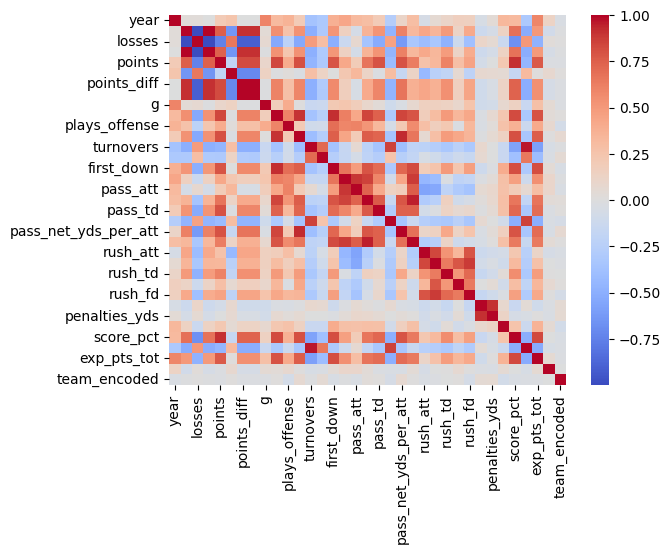

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Encode the Teams variable, to see if there is correlation between the team and its success
# If there is, we could infer that owners, GMs, location, etc. factor into team success (theoretically, they do)

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

nfl_data['team_encoded'] = le.fit_transform(nfl_data['team'])
numeric_data = nfl_data.drop(columns=['team'])
corr = numeric_data.corr()

sns.heatmap(corr, annot=False, cmap='coolwarm')

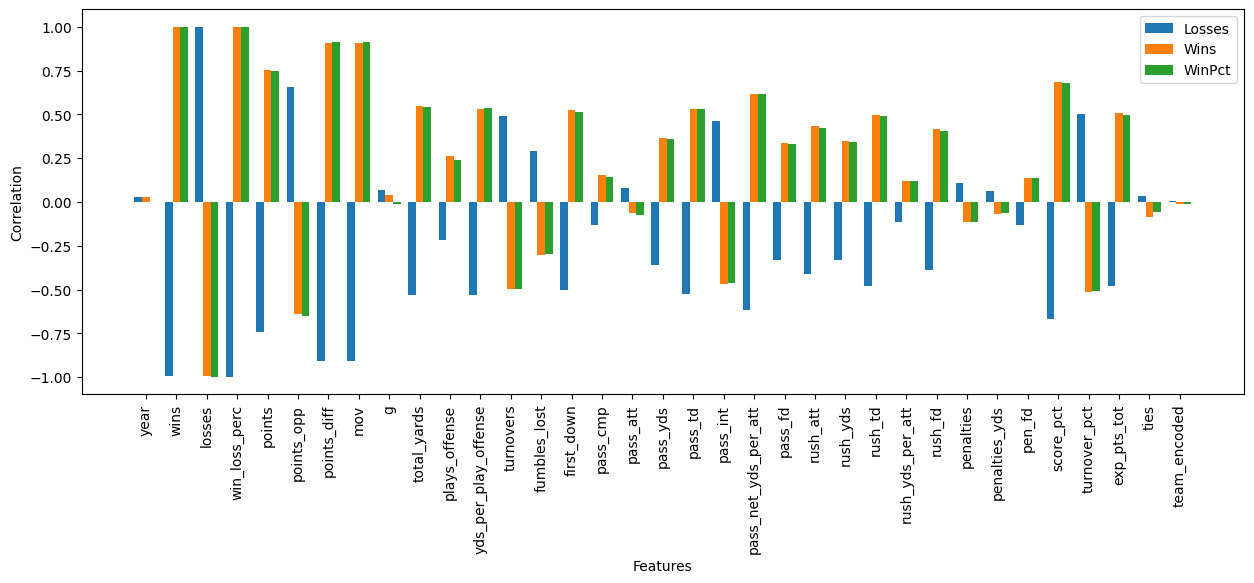

In [35]:
import numpy as np

corr_losses = numeric_data.corrwith(numeric_data['losses'])
corr_wins = numeric_data.corrwith(numeric_data['wins'])
corr_winpct = numeric_data.corrwith(numeric_data['win_loss_perc'])

# Define bar width and positions
bar_width = 0.25
index = np.arange(len(corr_losses))

fig = plt.figure(figsize=(15, 5))

# Plot bars
plt.bar(index - bar_width, corr_losses, bar_width, label='Losses')
plt.bar(index, corr_wins, bar_width, label='Wins')
plt.bar(index + bar_width, corr_winpct, bar_width, label='WinPct')

# Labeling
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(index, corr_losses.index, rotation=90)  # Adjust x-ticks to feature names
plt.legend()

plt.show()

### Are there any outliers in the data?

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


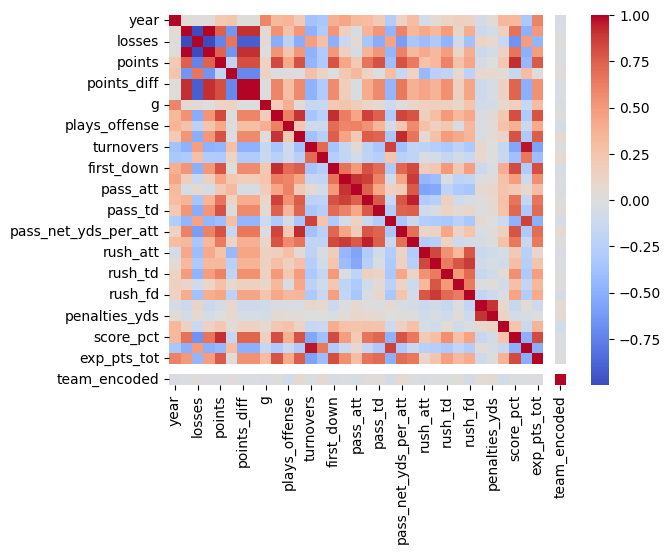

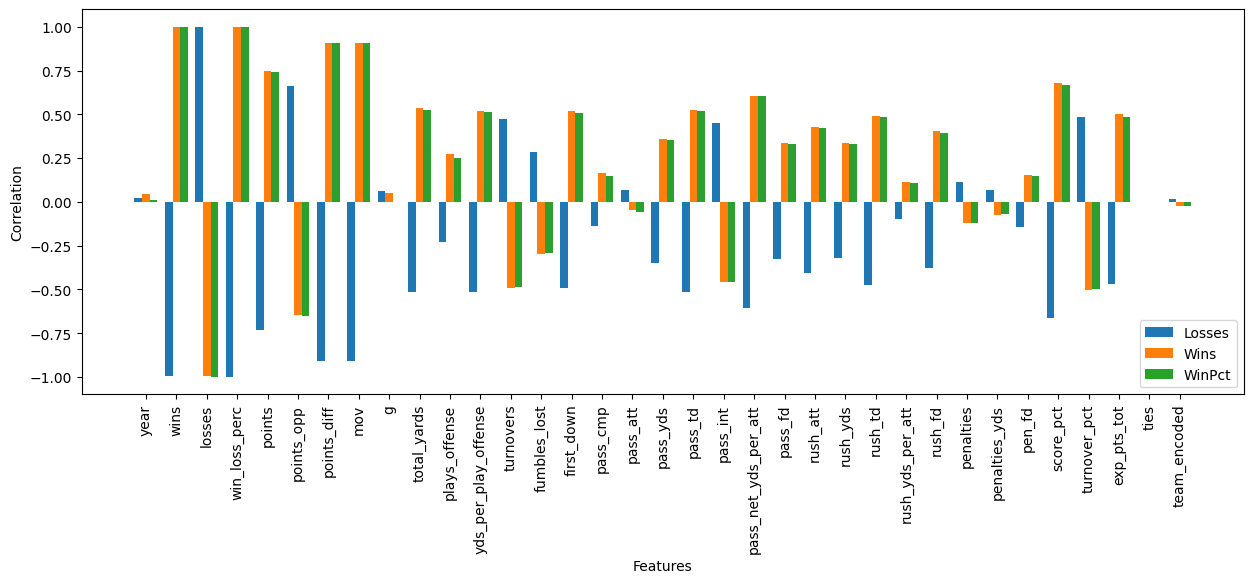

In [36]:
from scipy import stats

THRESHOLD = 3.5 # num of standard deviations away classified as an outlier
data = nfl_data.drop(columns=['team'])

for col in data:
    z = stats.zscore(data[col])
    data = data[(z < THRESHOLD) & (z > -THRESHOLD)]


corr = data.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm')


corr_losses = data.corrwith(data['losses'])
corr_wins = data.corrwith(data['wins'])
corr_winpct = data.corrwith(data['win_loss_perc'])

# Define bar width and positions
bar_width = 0.25
index = np.arange(len(corr_losses))

fig = plt.figure(figsize=(15, 5))

# Plot bars
plt.bar(index - bar_width, corr_losses, bar_width, label='Losses')
plt.bar(index, corr_wins, bar_width, label='Wins')
plt.bar(index + bar_width, corr_winpct, bar_width, label='WinPct')

# Labeling
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(index, corr_losses.index, rotation=90)  # Adjust x-ticks to feature names
plt.legend()

plt.show()

In [37]:
# Write the encoded, filtered data to the data file for model creation

data.to_csv("data/model_data.csv", index=False)